## **Proyecto Automatidata**
**Curso 6 - Los entresijos del aprendizaje automático**

Eres un profesional de datos en una empresa de análisis de datos llamada Automatidata. Su cliente, la New York City Taxi & Limousine Commission (New York City TLC), quedó impresionado con el trabajo que has hecho y te ha pedido que crees un `modelo de aprendizaje automático para predecir si un cliente no dejará propina`. Quieren utilizar el modelo en una aplicación que avise a los taxistas de los clientes que probablemente no dejarán propina, ya que los taxistas dependen de las propinas.

Se ha estructurado y preparado un cuaderno para ayudarle en este proyecto. Por favor, complete las siguientes preguntas.

# Curso 6 Proyecto de fin de curso: Construir un modelo de aprendizaje automático

En esta actividad, practicará el uso de técnicas de modelado basadas en árboles para predecir sobre una clase objetivo binaria.  
<br/>   

**El objetivo** de este modelo es encontrar formas de generar más ingresos para los taxistas.  
  
**El objetivo** de este modelo es predecir si un cliente deja o no propinas generosas.  
<br/>  

*Esta actividad consta de tres partes:*

**Parte 1:** Consideraciones éticas 
* Considera las implicaciones éticas de la solicitud 

* ¿Debería ajustarse el objetivo del modelo?

**Parte 2:** Ingeniería de características

* Realizar la selección, extracción y transformación de características para preparar los datos para el modelado.

**Parte 3:** Modelización

* Construir los modelos, evaluarlos y asesorar sobre los próximos pasos

Siga las instrucciones y responda a las preguntas siguientes para completar la actividad. A continuación, elabore un Resumen Ejecutivo utilizando las preguntas que figuran en el Documento de Estrategia PACE. 

Asegúrese de completar esta actividad antes de continuar. El siguiente punto del curso le proporcionará un modelo completado para que lo compare con su propio trabajo. 



# Construir un modelo de aprendizaje automático

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


A lo largo de estos cuadernos de proyecto, verás referencias al marco de resolución de problemas PACE. Los siguientes componentes del cuaderno están etiquetados con la etapa PACE correspondiente: Planificar, Analizar, Construir y Ejecutar.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la etapa del Plan.

En esta etapa, considere las siguientes preguntas:

1.  ¿Qué se le pide que haga?


2.   ¿Cuáles son las implicaciones éticas del modelo? 3. ¿Cuáles son las consecuencias de que tu modelo cometa errores?
  * ¿Cuál es el efecto probable del modelo cuando predice un falso negativo (es decir, cuando el modelo dice que un cliente dará propina, pero en realidad no lo hará)?
  
  * ¿Cuál es el efecto probable del modelo cuando predice un falso positivo (es decir, cuando el modelo dice que un cliente no dará propina, pero en realidad sí lo hará)?  
  
  
3.   ¿Las ventajas de un modelo de este tipo compensan los posibles problemas?
  
4.   ¿Seguiría adelante con la petición de construir este modelo? ¿Por qué sí o por qué no?
 
5.   ¿Puede modificarse el objetivo para hacerlo menos problemático?
 


**Pregunta 1**

Predecir si un cliente **no** dejará propina.

**Pregunta 2:**

Los conductores que no hayan recibido propinas probablemente se sentirán molestos porque la aplicación les haya dicho que un cliente dejaría propina. Si ocurriera a menudo, los conductores podrían no confiar en la aplicación.
Es improbable que los conductores recojan a personas de las que se predice que no dejarán propina. Los clientes tendrán dificultades para encontrar un taxi que les recoja y podrían enfadarse con la compañía. Incluso cuando el modelo sea correcto, las personas que no puedan permitirse dejar propina tendrán más dificultades para conseguir taxis, lo que limita la accesibilidad del servicio de taxi a quienes pagan más.

**Pregunta 3:**

No es bueno desincentivar a los conductores para que no recojan clientes. También podría provocar una reacción de los clientes. Los problemas parecen superar a los beneficios.

**Pregunta 4**

No. Limitar de hecho la igualdad de acceso a los taxis es éticamente problemático y conlleva muchos riesgos.

**Pregunta 5:**

Podemos construir un modelo que prediga cuáles son los clientes más generosos. De este modo se podría cumplir el objetivo de ayudar a los taxistas a aumentar sus ingresos por propinas y evitar al mismo tiempo la exclusión injusta de ciertas personas del uso del taxi.


Supongamos que modificamos el objetivo del modelo para que, en lugar de predecir quiénes no dejarán propina, predijéramos quiénes son especialmente generosos, es decir, quiénes dejarán una propina del 20% o más. Considere las siguientes preguntas:

1.  ¿Qué características necesita para hacer esta predicción?

2.  ¿Cuál sería la variable objetivo?  

3.  ¿Qué métrica debería utilizar para evaluar su modelo? ¿Dispone de información suficiente para decidirlo ahora?


**Pregunta 1:** 

Lo ideal sería disponer del historial de comportamiento de cada cliente, para saber cuánto ha dejado de propina en taxis anteriores. También querríamos saber la hora, la fecha y el lugar de recogida y devolución, la tarifa estimada y el método de pago.

**Pregunta 2:** 


La variable objetivo sería una variable binaria (1 o 0) que indica si se espera que el cliente deje o no una propina ≥ 20%.

**Pregunta 3:**  

Se trata de una tarea de aprendizaje supervisado, de clasificación. Podríamos utilizar la exactitud, la precisión, el recuerdo, la puntuación F, el área bajo la curva ROC, o una serie de otras métricas. Sin embargo, no tenemos suficiente información en este momento para saber cuáles son los más apropiados. Necesitamos conocer el equilibrio de clases de la variable objetivo.

**_Completa los siguientes pasos para empezar:_**

### **Tarea 1. Importación y carga de datos**

Importar paquetes y librerías necesarias para construir y evaluar modelos de clasificación random forest y XGBoost.

In [64]:
# Importar paquetes y bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Esta es la función que ayuda a trazar la importancia de las características 
from xgboost import plot_importance

In [65]:
# Esto nos permite ver todas las columnas, evitando que Juptyer las redacte.
pd.set_option('display.max_columns', None)  #Configura la opción de visualización de pandas para mostrar todas las columnas.

Comience leyendo los datos. Hay dos marcos de datos: uno contiene los datos originales, el otro contiene las duraciones medias, las distancias medias, y las tarifas predichas del proyecto del curso anterior llamado nyc_preds_means.csv.

**Nota:** `Pandas` lee el conjunto de datos como `df0`, ahora inspecciona las cinco primeras filas. Como se muestra en esta celda, el conjunto de datos se ha cargado automáticamente. No necesita descargar el archivo .csv ni proporcionar más código para acceder al conjunto de datos y continuar con este laboratorio. Por favor, continúe con esta actividad completando las siguientes instrucciones.

In [66]:
# Cargar el conjunto de datos en el marco de datos
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Importe las tarifas previstas y la distancia y duración medias del curso anterior
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')  #nyc_preds_means  nueva york predicciones significado

Inspecciona las primeras filas de `df0`.

In [67]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspeccione las primeras filas de `nyc_preds_means`.

In [68]:
# Inspeccione las primeras filas de `nyc_preds_means`.
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


#### Unir los dos marcos de datos

Une los dos marcos de datos utilizando el método que prefieras.

In [69]:
# Fusionar conjuntos de datos
df0 = df0.merge(nyc_preds_means,left_index=True,right_index=True)
#left_index=True, right_index=True == Indica que la fusión se realizará utilizando los índices de ambos DataFram
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Tenga en cuenta las preguntas de su documento de estrategia PACE para reflexionar sobre la fase de análisis.

### **Tarea 2. Ingeniería de características**

Usted ya ha preparado gran parte de estos datos y ha realizado análisis exploratorios de datos (EDA) en cursos anteriores. 

Llame a `info()` en el nuevo marco de datos combinado.

In [70]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Usted sabe por su EDA que los clientes que pagan en efectivo generalmente tienen un monto de propina de $0. Para cumplir con el objetivo del modelado, necesitará muestrear los datos para seleccionar sólo los clientes que pagan con tarjeta de crédito. 

Copie `df0` y asigne el resultado a una variable llamada `df1`. A continuación, utilice una máscara booleana para filtrar `df1` de modo que sólo contenga clientes que pagaron con tarjeta de crédito.

In [71]:
# Subconjunto de datos para aislar sólo a los clientes que pagaron con tarjeta de crédito
df1=df0[df0["payment_type"]==1]


In [72]:
df1.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706


##### **Objetivo**

Observa que no hay ninguna columna que indique el porcentaje de propina, que es lo que necesitas para crear la variable objetivo. Tendrás que diseñarla. 

Añade una columna `tip_percent` al dataframe realizando el siguiente cálculo:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


Redondea el resultado a tres decimales. **Este es un paso importante**, ya que afecta al número de clientes que reciben propinas generosas. De hecho, sin realizar este paso, aproximadamente 1.800 personas que dan propinas ≥ 20% serían etiquetadas como no generosas. 

Para entender por qué, hay que tener en cuenta cómo funcionan los flotantes. Los ordenadores realizan sus cálculos utilizando aritmética de punto flotante (de ahí la palabra "float"). La aritmética de coma flotante es un sistema que permite a los ordenadores expresar tanto números muy grandes como números muy pequeños con un alto grado de precisión, codificados en binario. Sin embargo, la precisión está limitada por el número de bits utilizados para representar un número, que suele ser de 32 o 64, dependiendo de las capacidades del sistema operativo. 

Esto tiene sus limitaciones, ya que a veces los cálculos que deberían dar como resultado valores limpios y precisos acaban codificados como decimales muy largos. Tomemos, por ejemplo, el siguiente cálculo:

In [73]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Observe el tres que está 16 lugares a la derecha del decimal. En consecuencia, si luego tuvieras un paso en tu código que identificara valores ≤ 3,3, éste no se incluiría en el resultado. Por lo tanto, siempre que realices un cálculo para computar un número que luego se utiliza para tomar una decisión o filtración importante, redondea el número. Cuántos grados de precisión redondear es su decisión, que debe basarse en su caso de uso. 

Consulte [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  
Consulte [guide for more information related to fixed-point arithmetic](https://inst.eecs.berkeley.edu/~cs61c/sp06/handout/fixedpt.html), que es una alternativa a la aritmética de coma flotante utilizada en determinados casos.

In [74]:
# Create tip % col
porcentaje_de_propina=round(df1["tip_amount"]/(df1["total_amount"]-df1["tip_amount"]), 3)


In [75]:
porcentaje_de_propina.head(5)

0    0.200
1    0.238
2    0.199
3    0.300
5    0.200
dtype: float64

Ahora cree otra columna llamada `generous`. Esta será la variable objetivo. La columna debe ser un indicador binario de si un cliente dio o no una propina ≥ 20% (0=no, 1=sí).

1. Empiece haciendo de la columna `generosa` una copia de la columna `porcentaje_de_propina`.
2. Reasigne la columna convirtiéndola en booleana (Verdadero/Falso).
3. Reasigne la columna convirtiéndola de booleana a binaria (1/0).

In [76]:
def propina(columna):
    if columna >= 0.20:
        return 1
    else:
        return 0

In [77]:
propina(0.5)

1

In [78]:
# Crear 'generoso' col (objetivo)
df1["generoso"]=porcentaje_de_propina.apply(propina)

In [79]:
df1["generoso"]

0        1
1        1
2        0
3        1
5        1
        ..
22692    1
22693    1
22695    1
22697    0
22698    0
Name: generoso, Length: 15265, dtype: int64

In [80]:
df1.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
mean_duration            float64
mean_distance            float64
predicted_fare           float64
generoso                   int64
dtype: object

#### Crea las columna dia 

A continuación, trabajaremos con las columnas de recogida y devolución.

Convierte las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` a datetime.

In [81]:
# Convertir las columnas de recogida y entrega en fecha y hora
df1["tpep_pickup_datetime"]=pd.to_datetime(df1["tpep_pickup_datetime"],format='%m/%d/%Y %I:%M:%S %p')
df1["tpep_dropoff_datetime"]=pd.to_datetime(df1["tpep_dropoff_datetime"],format='%m/%d/%Y %I:%M:%S %p')


In [82]:
print(df1["tpep_pickup_datetime"].head(3))
print(df1["tpep_dropoff_datetime"].head(3))

0   2017-03-25 08:55:43
1   2017-04-11 14:53:28
2   2017-12-15 07:26:56
Name: tpep_pickup_datetime, dtype: datetime64[ns]
0   2017-03-25 09:09:47
1   2017-04-11 15:19:58
2   2017-12-15 07:34:08
Name: tpep_dropoff_datetime, dtype: datetime64[ns]


Cree una columna `día` que contenga sólo el día de la semana en que se recogió a cada pasajero. A continuación, convierta los valores a minúsculas.

In [83]:
# Create a 'day' col
df1["dia"] = df1["tpep_pickup_datetime"].dt.day_name().str.lower()
df1["dia"].head(3)

0    saturday
1     tuesday
2      friday
Name: dia, dtype: object

#### Crear columnas con la hora del día

A continuación, cree cuatro nuevas columnas que representen franjas horarias. Cada columna debe contener valores binarios (0=no, 1=sí) que indiquen si un viaje comenzó (recogió) durante las siguientes horas:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

Para ello, cree primero las cuatro columnas. Por ahora, cada nueva columna debe ser idéntica y contener la misma información: la hora (únicamente) de la columna `tpep_pickup_datetime`.

In [84]:
# Create 'am_rush' col
df1["hora_pico_de_la_mañana"]=df1["tpep_pickup_datetime"].dt.hour

# Create 'daytime' col
df1["durante_el_dia"]=df1["tpep_pickup_datetime"].dt.hour

# Crear columna "pm_rush"
df1["hora_pico_de_la_tarde"]=df1["tpep_pickup_datetime"].dt.hour

# Crear columna "nighttime"
df1["noche"]=df1["tpep_pickup_datetime"].dt.hour


In [85]:
df1.head(4)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,generoso,dia,hora_pico_de_la_mañana,durante_el_dia,hora_pico_de_la_tarde,noche
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,1,saturday,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,1,tuesday,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0,friday,7,7,7,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,1,sunday,13,13,13,13


Tendrás que escribir cuatro funciones para convertir cada nueva columna a binario (0/1). Empieza con `am_rush`. Completa la función de forma que si la hora está entre [06:00–10:00), it returns 1, otherwise, it returns 0.

In [86]:
# Definir la función de conversión 'am_rush()' [06:00-10:00)
def hora_pico(hora):
    if 6 <= hora['hora_pico_de_la_mañana'] < 10:
        valor = 1
    else:
        valor = 0
    return valor

Ahora, aplica la función `hora_pico` a la serie `am_rush` para realizar la conversión. Imprime los cinco primeros valores de la columna para asegurarte de que ha hecho lo que esperabas.

**Nota:** ¡Ten cuidado! Si ejecutas esta celda dos veces, la función se volverá a aplicar y los valores cambiarán todos a 0.

In [87]:
# Aplica la función 'am_rush' a la serie 'am_rush'
df1['hora_pico_de_la_mañana'] = df1.apply(hora_pico, axis=1)
df1['hora_pico_de_la_mañana'].head()

0    1
1    0
2    1
3    0
5    0
Name: hora_pico_de_la_mañana, dtype: int64

Escribe funciones para convertir las tres columnas restantes y aplícalas a sus respectivas series.

In [88]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(dia):
    if 10 <= dia["durante_el_dia"] <16:
        valor = 1
    else:
        valor = 0
    return valor 

In [89]:
# Apply 'daytime()' function to the 'daytime' series
df1["durante_el_dia"] = df1.apply(daytime, axis=1)
df1["durante_el_dia"].head()

0    0
1    1
2    0
3    1
5    0
Name: durante_el_dia, dtype: int64

In [90]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def hora_tarde(tarde):
    if 16 <= tarde["hora_pico_de_la_tarde"] <20:
        valor = 1
    else:
        valor = 0
    return valor 

In [91]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1["hora_pico_de_la_tarde"]=df1.apply(hora_tarde, axis=1)
df1["hora_pico_de_la_tarde"].head()

0    0
1    0
2    0
3    0
5    0
Name: hora_pico_de_la_tarde, dtype: int64

In [92]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour["noche"] < 24:
        val = 1
    elif 0 <= hour["noche"] < 6:
        val = 1
    else:
        val = 0
    return val

In [93]:
# Apply 'nighttime' function to the 'nighttime' series
df1["noche"]=df1.apply( nighttime, axis=1)
df1["noche"].head()

0    0
1    0
2    0
3    0
5    1
Name: noche, dtype: int64

#### Crear columna "mes

Ahora, cree una columna `mes` que contenga sólo el nombre abreviado del mes en que se recogió a cada pasajero y, a continuación, convierta el resultado a minúsculas.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [94]:
# Create 'month' col
df1["mes"] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine las cinco primeras filas de su marco de datos.

In [95]:
df1.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,generoso,dia,hora_pico_de_la_mañana,durante_el_dia,hora_pico_de_la_tarde,noche,mes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,1,saturday,0,0,0,1,mar


#### Eliminar columnas

Elimine las columnas redundantes e irrelevantes, así como las que no estén disponibles cuando se despliegue el modelo. Esto incluye información como tipo de pago, distancia del viaje, importe de la propina, porcentaje de la propina, importe total, importe del peaje, etc. La variable objetivo (`generous`) debe permanecer en los datos porque se aislará como los datos `y` para el modelado.

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              15265 non-null  int64         
 1   VendorID                15265 non-null  int64         
 2   tpep_pickup_datetime    15265 non-null  datetime64[ns]
 3   tpep_dropoff_datetime   15265 non-null  datetime64[ns]
 4   passenger_count         15265 non-null  int64         
 5   trip_distance           15265 non-null  float64       
 6   RatecodeID              15265 non-null  int64         
 7   store_and_fwd_flag      15265 non-null  object        
 8   PULocationID            15265 non-null  int64         
 9   DOLocationID            15265 non-null  int64         
 10  payment_type            15265 non-null  int64         
 11  fare_amount             15265 non-null  float64       
 12  extra                   15265 non-null  float6

In [97]:
#eliminar columnas 
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount']

df1 = df1.drop(drop_cols, axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorID                15265 non-null  int64  
 1   passenger_count         15265 non-null  int64  
 2   RatecodeID              15265 non-null  int64  
 3   PULocationID            15265 non-null  int64  
 4   DOLocationID            15265 non-null  int64  
 5   mean_duration           15265 non-null  float64
 6   mean_distance           15265 non-null  float64
 7   predicted_fare          15265 non-null  float64
 8   generoso                15265 non-null  int64  
 9   dia                     15265 non-null  object 
 10  hora_pico_de_la_mañana  15265 non-null  int64  
 11  durante_el_dia          15265 non-null  int64  
 12  hora_pico_de_la_tarde   15265 non-null  int64  
 13  noche                   15265 non-null  int64  
 14  mes                     15265 non-null

#### Codificación de variables

Muchas de las columnas son categóricas y tendrán que ser dummied (convertido a binario). Algunas de estas columnas son numéricas, pero en realidad codifican información categórica, como `RatecodeID` y las ubicaciones de recogida y entrega. Para que la función `get_dummies()` reconozca estas columnas como variables categóricas, primero tendrá que convertirlas a `type(str)`. 

1. Defina una variable llamada `cols_to_str`, que es una lista de las columnas numéricas que contienen información categórica y que deben convertirse a cadena: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Escribe un bucle for que convierta cada columna de `cols_to_str` en cadena.

In [98]:
# 1. Definir lista de cols a convertir en cadena
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convertir cada columna en cadena
for col in cols_to_str:
    df1[col] = df1[col].astype('str')


<details>
  <summary><h5>HINT</h5></summary>

Para convertir a cadena, utilice `astype(str)` en la columna.
</details>

Ahora convierta todas las columnas categóricas a binarias.

1. Llame a `get_dummies()` en el marco de datos y asigne los resultados a un nuevo marco de datos llamado `df2`.


In [99]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to mes_sep
dtypes: float64(3), int64(6), uint8(338)
memory usage: 6.1 MB


##### Métrica de evaluación

Antes de modelar, debe decidir una métrica de evaluación. 

1. Examine el equilibrio de clases de su variable objetivo. 

In [100]:
# Conseguir el equilibrio de clase de los "generosos" col
df2["generoso"].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generoso, dtype: float64

Algo más de la mitad de los clientes de este conjunto de datos fueron "generosos" (propina ≥ 20%). El conjunto de datos está casi equilibrado.

Para determinar una métrica, considere el coste de ambos tipos de error del modelo:
* Falsos positivos (el modelo predice una propina ≥ 20%, pero el cliente no la da).
* Falsos negativos (el modelo predice una propina < 20%, pero el cliente da más).

Los falsos positivos son peores para los taxistas, porque recogerían a un cliente que espera una buena propina y luego no la recibe, lo que frustra al conductor.

Los falsos negativos son peores para los clientes, porque un taxista probablemente recogería a otro cliente que se predijo que daría más propina&mdash;incluso cuando el cliente original hubiera dado una propina generosa.

**Lo que está en juego es relativamente parejo. Quiere ayudar a los taxistas a ganar más dinero, pero no quiere enfadar a los clientes. La métrica debe ponderar por igual la precisión y la recuperación. ¿Qué métrica es?**

La puntuación F<sub>1</sub> es la métrica que da la misma importancia a los verdaderos positivos y a los falsos positivos, y por tanto a la precisión y al recuerdo.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Considere las preguntas de su Documento de Estrategia PACE para reflexionar sobre la fase de Construcción.

### **Tarea 3. Modelado**

##### **Dividir los datos**

Ya está listo para modelar. El único paso que queda es dividir los datos en características/variable objetivo y datos de entrenamiento/prueba. 

1. Define una variable `y` que aísle la variable objetivo (`generous`).
2. Definir una variable `X` que aísle las características.
3. Divida los datos en conjuntos de entrenamiento y de prueba. Coloque el 20% de las muestras en el conjunto de prueba, estratifique los datos y establezca el estado aleatorio.

In [101]:
# Aislar la variable objetivo (y)
y=df2["generoso"]

# Aislar las características (X)
X = df2.drop('generoso', axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##### **Bosque aleatorio**

Comience con el uso de `GridSearchCV` para afinar un modelo de bosque aleatorio.

1. Instanciar el clasificador de bosque aleatorio `rf` y establecer el estado aleatorio.

2. Cree un diccionario `cv_params` de cualquiera de los siguientes hiperparámetros y sus valores correspondientes para afinar. Cuanto más ajuste, mejor se ajustará su modelo a los datos, pero más tiempo le llevará. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Definir un conjunto `scoring` de métricas de puntuación para que GridSearch las capture (precisión, recall, puntuación F1 y exactitud).

4. Instanciar el objeto `GridSearchCV` `rf1`. Pásale como argumentos
 - estimator=`rf`
 - param_grid=`cv_params`.
 - puntuación=`puntuación`
 - cv: defina el número de pliegues de validación cruzada que desea (`cv=_`)
 - refit: indique qué métrica de evaluación desea utilizar para seleccionar el modelo (`refit=_`)


**Nota:** `refit` debe ajustarse a `'f1'`.<font/>
</details>
 


In [102]:
# 1. Instanciar el clasificador de bosque aleatorio
rf = RandomForestClassifier(random_state=42)

# 2. Crear un diccionario de hiperparámetros para sintonizar 
cv_params = {'max_depth': [None], #profundidad_maxima
             'max_features': [1.0],#características_maximas
             'max_samples': [0.7],  #Muestras_maximas
             'min_samples_leaf': [1],# hoja_muestras_min
             'min_samples_split': [2],#numero_minimo_hojas
             'n_estimators': [300] #numero_estimadores
             }


# 3. Definir un conjunto de métricas de puntuación para capturar

scoring = {'accuracy', 'precision', 'recall', 'f1'}  #"exactitud", "precision", "recupera"

# 4. Instanciar el objeto GridSearchCV
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')



Ahora ajuste el modelo a los datos de entrenamiento. Tenga en cuenta que, dependiendo de cuántas opciones incluya en su cuadrícula de búsqueda y del número de pliegues de validación cruzada que seleccione, esto podría llevarle mucho tiempo&mdash;incluso horas. Si utiliza la validación cuádruple e incluye sólo un valor posible para cada hiperparámetro y hace crecer 300 árboles hasta la profundidad total, debería tardar unos 5 minutos. Si se añade otro valor para que GridSearch compruebe, por ejemplo, `min_samples_split` (de modo que todos los hiperparámetros tienen ahora 1 valor excepto `min_samples_split`, que tiene 2 posibilidades), el tiempo se duplicaría a ~10 minutos. Cada parámetro adicional duplicaría aproximadamente el tiempo. 

In [103]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 4min 11s, sys: 51.9 ms, total: 4min 11s
Wall time: 4min 12s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

<details>
  <summary><h5>HINT</h5></summary>

Si recibe una advertencia de que una métrica es 0 debido a que no hay muestras predichas, piense en cuántas características está muestreando con `max_features`. ¿Cuántas características hay en el conjunto de datos? ¿Cuántas son lo suficientemente predictivas como para dar buenas predicciones dentro del número de divisiones que ha permitido (determinado por el hiperparámetro `max_depth`)? Considere la posibilidad de aumentar "max_características".

</details>

Si lo desea, utilice `pickle` para guardar sus modelos y volver a leerlos. Esto puede ser particularmente útil cuando se realiza una búsqueda sobre muchos posibles valores de hiperparámetros.

In [110]:
import pickle 

# Define una ruta a la carpeta donde quieres guardar el modelo
path = '/home/jovyan/work/'

In [111]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [112]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine la mejor puntuación media en todos los pliegues de validación. 

In [113]:
# Examine best score
rf1.best_score_

0.7136009788848705

Examinar la mejor combinación de hiperparámetros.

In [114]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Utilice la función `make_results()` para obtener todas las puntuaciones de su modelo. Tenga en cuenta que acepta tres argumentos. 

<details>
  <summary><h5>HINT</h5></summary>

Para obtener más información sobre cómo esta función accede a los resultados de la validación cruzada, consulte la [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) para el atributo `cv_results_`.

</details>

In [115]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Argumentos:
    nombre_modelo (cadena): cómo quieres que se llame el modelo en la tabla de salida
    objeto_modelo: un objeto GridSearchCV ajustado
    metric (string): precisión, recall, f1, o exactitud

    Devuelve un df pandas con las puntuaciones F1, recall, precisión y exactitud
    para el modelo con la mejor puntuación 'métrica' media en todos los pliegues de validación.
    '''

    # Crear diccionario que asigne la métrica de entrada al nombre real de la métrica en GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Obtenga todos los resultados del CV y póngalos en un df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Aislar la fila del df con la puntuación max(metric)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extraer las puntuaciones Accuracy, precision, recall y f1 de esa fila
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Crear tabla de resultados
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Llama a `make_results()` en el objeto GridSearch.

In [116]:
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233


Sus resultados deben producir un modelo aceptable en todos los ámbitos. Normalmente, las puntuaciones de 0,65 o superiores se consideran aceptables, pero esto depende siempre de su caso de uso. Opcional: intente mejorar las puntuaciones. Merece la pena intentarlo, sobre todo para practicar la búsqueda con distintos hiperparámetros.

<details>
  <summary><h5>HINT</h5></summary>

Por ejemplo, si los valores disponibles para `min_samples_split` eran [2, 3, 4] y GridSearch identificó el mejor valor como 4, considere probar con [4, 5, 6] esta vez.
</details>

Utilice su modelo para predecir en los datos de prueba. Asigna los resultados a una variable llamada `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
No se puede llamar a `predict()` en el objeto GridSearchCV directamente. Debe hacerlo en el `best_estimator_`.
</details>

Para este proyecto, utilizará varios modelos de predicción sobre los datos de prueba. Recuerde que esta decisión conlleva un compromiso. ¿Cuál es la ventaja? ¿Cuál es el inconveniente?

La ventaja de utilizar varios modelos para predecir los datos de prueba es que se pueden comparar los modelos con datos que no se utilizaron para entrenar/ajustar los hiperparámetros. Esto reduce el riesgo de seleccionar un modelo basándose en lo bien que se ajusta a los datos de entrenamiento.

El inconveniente de utilizar los datos de prueba finales para seleccionar un modelo es que, al utilizar los datos no vistos para tomar una decisión sobre qué modelo utilizar, ya no se tiene una idea verdaderamente imparcial de cómo se esperaría que funcionara el modelo con los nuevos datos. En este caso, piense en la selección del modelo final como otra forma de "afinar" su modelo.

In [117]:
# Obtener puntuaciones sobre los datos de las pruebas
rf_preds = rf1.best_estimator_.predict(X_test)

Utilice la siguiente función `get_test_scores()` para obtener las puntuaciones del modelo en los datos de prueba.

In [118]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generar una tabla de puntajes de exámenes.

    En:
    model_name (cadena): Su elección: cómo se nombrará el modelo en la tabla de salida
    preds: gran variedad de predicciones de prueba
    y_test_data: matriz numerosa de datos de y_test

    Afuera:
    tabla: un pandas df de precisión, recuperación, f1 y puntuaciones de precisión para su modelo
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Utilice la función `get_test_scores()` para generar las puntuaciones en los datos de la prueba. Asigne los resultados a `rf_test_scores`.
2. Llame a `rf_test_scores` para generar los resultados.

###### Resultados de la prueba de RF

In [119]:
 # Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538


**Pregunta:** ¿Cómo se comparan los resultados de su prueba con los resultados de su validación?

Todas las puntuaciones aumentaron como máximo ~0,02.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)
 
 
 ##### **XGBoost**

 Intente mejorar sus puntuaciones utilizando un modelo XGBoost.

1. Cree una instancia del clasificador XGBoost `xgb` y establezca `objective='binary:logistic'`. También establezca el estado aleatorio.

2. Cree un diccionario `cv_params` de los siguientes hiperparámetros y sus valores correspondientes para ajustar:
 - `max_profundidad`
 - `min_child_weight`
 - `tasa_de_aprendizaje`
 - `n_estimadores`

3. Defina un conjunto de "puntuación" de métricas de puntuación para que la búsqueda en la cuadrícula las capture (precisión, recuperación, puntuación F1 y exactitud).

4. Cree una instancia del objeto `GridSearchCV` `xgb1`. Pasarlo como argumentos:
 - estimador=`xgb`
 - param_grid=`cv_params`
 - puntuación = `puntuación`
 - cv: define el número de pliegues de validación cruzada que deseas (`cv=_`)
 - refit: indique qué métrica de evaluación desea utilizar para seleccionar el modelo (`refit='f1'`)

In [120]:
# 1.Crear una instancia del clasificador XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Crea un diccionario de hiperparámetros para sintonizar
# Tenga en cuenta que este ejemplo solo contiene 1 valor para cada parámetro por simplicidad,
# pero deberías asignar un diccionario con rangos de valores
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Definir un conjunto de métricas de puntuación para capturar
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Crear una instancia del objeto GridSearchCV
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

Ahora ajuste el modelo a los datos `X_train` e `y_train`.

In [121]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 6min 59s, sys: 656 ms, total: 6min 59s
Wall time: 3min 30s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                   

Consigue la mejor puntuación de este modelo.

In [122]:
# Examinar la mejor puntuación
xgb1.best_score_

0.6977560172278552

Y los mejores parámetros.

In [123]:
# Examinar los mejores parámetros
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

##### Resultados de CV de XGB

Utilice la función `make_results()` para generar todas las puntuaciones de su modelo. Tenga en cuenta que acepta tres argumentos.

In [124]:
# Llame a 'make_results()' en el objeto GridSearch
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.673074,0.724487,0.697756,0.669669


Utilice su modelo para predecir sobre los datos de prueba. Asigne los resultados a una variable llamada `xgb_preds`.
<details>
  <summary><h5>HINT</h5></summary>
No puede llamar a `predict()` en el objeto GridSearchCV directamente. Debes llamarlo en el `best_estimator_`.
</details>

In [125]:
# Obtenga puntuaciones en los datos de las pruebas
xgb_preds = xgb1.best_estimator_.predict(X_test)

###### Resultados de la prueba XGB

1. Utilice la función `get_test_scores()` para generar las puntuaciones en los datos de la prueba. Asigne los resultados a `xgb_test_scores`.
2. Llame a `xgb_test_scores` para generar los resultados.

In [126]:
#Obtenga puntuaciones en los datos de las pruebas
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674919,0.757312,0.713601,0.680233
0,RF test,0.675297,0.779091,0.723490,0.686538
0,XGB CV,0.673074,0.724487,0.697756,0.669669
0,XGB test,0.675660,0.747978,0.709982,0.678349


**Pregunta:** Compare estos puntajes con los puntajes de las pruebas forestales aleatorias. ¿Que notaste? ¿Qué modelo elegirías?

La puntuación F<sub>1</sub> es ~0,01 menor que la del modelo de bosque aleatorio. Ambos modelos son aceptables, pero el modelo de bosque aleatorio es el campeón.

Trazar una matriz de confusión de las predicciones del modelo sobre los datos de prueba.

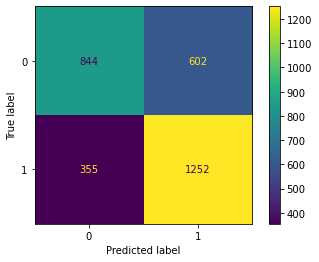

In [127]:
# Generar una matriz de valores para la matriz de confusión
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Matriz de confusión de la trama
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

**Pregunta:** ¿Qué tipo de errores son más comunes en su modelo?

El modelo tiene casi el doble de probabilidades de predecir un falso positivo que un falso negativo. Por tanto, los errores de tipo I son más comunes. Esto es menos deseable, porque es mejor para un conductor quedar gratamente sorprendido con una propina generosa cuando no la esperaba que desilusionarse con una propina baja cuando esperaba una generosa. Sin embargo, el rendimiento general de este modelo es satisfactorio.

##### Importancia de la característica

Utilice el atributo `feature_importances_` del mejor objeto estimador para inspeccionar las características de su modelo final. Luego puedes ordenarlos y trazar los más importantes.

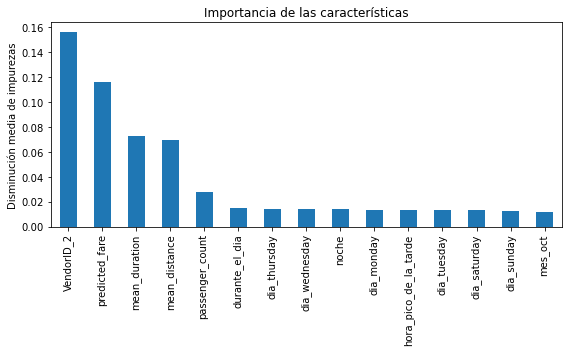

In [128]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Importancia de las características')
ax.set_ylabel('Disminución media de impurezas')
fig.tight_layout();

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Considere las preguntas de su Documento de estrategia PACE para reflexionar sobre la etapa de Ejecución.

### **Tarea 4. Conclusión**

En este paso, utilice los resultados de los modelos anteriores para formular una conclusión. Considere las siguientes preguntas:

**Respuestas ejemplares:**
1. **¿Recomendarías usar este modelo? ¿Por qué o por qué no?**
Sí, este modelo funciona aceptablemente. Su puntuación F<sub>1</sub> fue 0,7235 y tuvo una precisión general de 0,6865. Identificó correctamente ~78 % de los encuestados reales en el conjunto de prueba, lo que es un 48 % mejor que una suposición aleatoria. Puede que valga la pena probar el modelo con un grupo selecto de taxistas para obtener comentarios.


2. **¿Qué estaba haciendo su modelo con la puntuación más alta? ¿Puedes explicar cómo hacía las predicciones?**
Desafortunadamente, el bosque aleatorio no es el algoritmo de aprendizaje automático más transparente. Sabemos que "VendorID", "predicted_fare", "mean_duration" y "mean_distance" son las características más importantes, pero no sabemos cómo influyen en las propinas. Esto requeriría una mayor exploración. Es interesante que "VendorID" sea la característica más predictiva. Esto parece indicar que uno de los dos proveedores tiende a atraer clientes más generosos. Puede que valga la pena realizar pruebas estadísticas con los diferentes proveedores para examinar esto más a fondo.

3. **¿Hay nuevas características que puedas diseñar que puedan mejorar el rendimiento del modelo?**
Casi siempre hay características adicionales que se pueden diseñar, pero es de esperar que las más obvias se generaron durante la primera ronda de modelado. En nuestro caso, podríamos intentar crear tres nuevas columnas que indiquen si la distancia del viaje es corta, media o larga. También podríamos diseñar una columna que proporcione una relación que represente (la cantidad de dinero desde el monto de la tarifa hasta el múltiplo superior más cercano de \\$5) / monto de la tarifa. Por ejemplo, si la tarifa fuera \\$12, el valor en esta columna sería 0,25, porque \\$12 al múltiplo mayor más cercano de \\$5 (\\$15) es \\$3, y \\$3 dividido por \ \$12 es 0,25. La intuición de esta característica es que es probable que las personas simplemente redondeen su propina, por lo que los viajes con tarifas con valores justo por debajo de un múltiplo de \\$5 pueden tener porcentajes de propina más bajos que aquellos con valores de tarifa ligeramente superiores a un múltiplo de \\$5. . También podríamos hacer lo mismo con las tarifas al \\$10 más cercano.

$$
round5\_ratio = \frac{amount\ of\ money\ from\ the\ fare\ amount\ to\ the\ nearest\ higher\ multiple\ of\ \$5}{fare\ amount}
$$

<br>

<details>
    <summary><h5>HINT</h5></summary>
    $$ = \frac{5 - (fare\ mod\ 5)}{fare\ amount}$$
</details>

<br>

4. **¿Qué características le gustaría tener que probablemente mejorarían el rendimiento de su modelo?**
Probablemente sería muy útil conocer el comportamiento de propinas de cada cliente en el pasado. También sería valioso tener valores precisos de las propinas para los clientes que pagan en efectivo.
Sería útil tener muchos más datos. Con suficientes datos, podríamos crear una función única para cada combinación de recogida/devolución.


Recuerde, a veces sus datos simplemente no predecirán el objetivo elegido. Esto es común. El aprendizaje automático es una herramienta poderosa, pero no es mágica. Si sus datos no contienen una señal predictiva, ni siquiera el algoritmo más complejo podrá ofrecer predicciones consistentes y precisas. No tengas miedo de sacar esta conclusión. Incluso si no se puede utilizar el modelo para hacer predicciones sólidas, ¿se hizo el trabajo en vano? ¿Qué ideas puede informar a las partes interesadas?

**¡Felicitaciones!** Ha completado esta práctica de laboratorio. Sin embargo, es posible que no notes una marca de verificación verde junto a este elemento en la plataforma de Coursera. Continúe su progreso independientemente de la marca de verificación. Simplemente haga clic en el ícono "guardar" en la parte superior de este cuaderno para asegurarse de que su trabajo haya sido registrado.